<a href="https://colab.research.google.com/github/sipocz/pid_time_series/blob/main/Pid_time_Series_DataPipeline.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import json
import pandas as pd

In [10]:
url="https://github.com/sipocz/pid_time_series/raw/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv"


In [11]:
fname=url.split("/")[-1]

In [12]:
!rm $fname*

In [13]:
!wget $url

--2022-07-25 13:45:30--  https://github.com/sipocz/pid_time_series/raw/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv
Resolving github.com (github.com)... 140.82.114.3
Connecting to github.com (github.com)|140.82.114.3|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/sipocz/pid_time_series/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv [following]
--2022-07-25 13:45:30--  https://raw.githubusercontent.com/sipocz/pid_time_series/2e7d263d051c58e9ba9f879472a02ed6fe0d79f5/HW_PID.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 4260 (4.2K) [text/plain]
Saving to: ‘HW_PID.csv’

HW_PID.csv          100%[===================>]   4.16K  --.-KB/s    in 0s      

2022-07-25 13:45:30 (36.8 MB/s)

In [14]:
def get_controller_name(fname):
    f=open(fname)
    o=f.readlines()
    f.close()
    py_json=json.loads(o[0])
    out=py_json[0]["itemID"].split(".")[0]
    return(out)


In [15]:

__DEBUG__=True
def extract_values(fname,cname,to_csv=False):
    oo=[]
    pid_tag=get_controller_name(fname)
    f=open(fname)
    o=f.readlines()
    f.close()
    for py_json_str in o:
        py_json=json.loads(py_json_str)
        for rec in py_json:
            if rec["itemID"]==pid_tag+cname:
                if __DEBUG__:    
                    print(f'{rec["timestamp"]},{rec["value"]}')
                oo.append([rec["timestamp"],rec["value"]])
    if to_csv:
        df=pd.DataFrame(oo,columns=["timestamp","values"])
        pd.to_datetime(df['timestamp'], format="%Y-%m-%dT%H:%M:%S.%fZ")
        pid_tag_fname=pid_tag+cname+".csv"
        df.to_csv(pid_tag_fname,index=False)
        return(df)
    return()    

In [16]:
df=extract_values(fname,".PV",to_csv=True)

2022-06-23T09:34:57.601Z,-30.749155044555664
2022-06-23T09:35:02.601Z,-30.477317810058594
2022-06-23T09:35:07.601Z,-30.92232894897461
2022-06-23T09:35:12.601Z,-30.669662475585938
2022-06-23T09:35:17.601Z,-29.92696189880371
2022-06-23T09:35:22.601Z,-30.067441940307617
2022-06-23T09:35:27.601Z,-30.059770584106445
2022-06-23T09:35:32.601Z,-29.704492568969727
2022-06-23T09:35:37.601Z,-29.341022491455078


In [17]:
df.head()

timestamp     values
0  2022-06-23T09:34:57.601Z -30.749155
1  2022-06-23T09:35:02.601Z -30.477318
2  2022-06-23T09:35:07.601Z -30.922329
3  2022-06-23T09:35:12.601Z -30.669662
4  2022-06-23T09:35:17.601Z -29.926962

In [18]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [19]:
fname="/gdrive/MyDrive/2022Anna/Data/Honeywell/2T3_3L1_DPH7_0711.csv"

In [20]:
df=extract_values(fname,".MD",to_csv=True)

A streamkimeneten csak az utolsó 5000 sor látható.
2022-07-10T15:21:06.401Z,2
2022-07-10T15:21:16.401Z,2
2022-07-10T15:21:26.401Z,2
2022-07-10T15:21:36.401Z,2
2022-07-10T15:21:46.401Z,2
2022-07-10T15:21:56.401Z,2
2022-07-10T15:22:06.401Z,2
2022-07-10T15:22:16.401Z,2
2022-07-10T15:22:26.401Z,2
2022-07-10T15:22:36.401Z,2
2022-07-10T15:22:46.401Z,2
2022-07-10T15:22:56.401Z,2
2022-07-10T15:23:06.401Z,2
2022-07-10T15:23:16.401Z,2
2022-07-10T15:23:26.401Z,2
2022-07-10T15:23:36.401Z,2
2022-07-10T15:23:46.401Z,2
2022-07-10T15:23:56.401Z,2
2022-07-10T15:24:06.401Z,2
2022-07-10T15:24:16.401Z,2
2022-07-10T15:24:26.401Z,2
2022-07-10T15:24:36.401Z,2
2022-07-10T15:24:46.401Z,2
2022-07-10T15:24:56.401Z,2
2022-07-10T15:25:06.401Z,2
2022-07-10T15:25:16.401Z,2
2022-07-10T15:25:26.401Z,2
2022-07-10T15:25:36.401Z,2
2022-07-10T15:25:46.401Z,2
2022-07-10T15:25:56.401Z,2
2022-07-10T15:26:06.401Z,2
2022-07-10T15:26:16.401Z,2
2022-07-10T15:26:26.401Z,2
2022-07-10T15:26:36.401Z,2
2022-07-10T15:26:46.401Z,2
2022

In [21]:
!pwd

/content


In [22]:
cp 2T3*.csv /gdrive/MyDrive/2022Anna/Datapipeline/1

In [23]:
# Itt kezdődhet a feldolgozás

In [9]:
import pandas as pd


In [10]:
from google.colab import drive
drive.mount('/gdrive',force_remount=True)

Mounted at /gdrive


In [11]:
hw_df=pd.read_csv("/gdrive/MyDrive/2022Anna/Datapipeline/1/2T3_3L1_DPH7.PV.csv")


In [12]:
print(hw_df.head())
print (hw_df.dtypes)


                  timestamp     values
0  2022-06-23T11:05:32.601Z  26.640650
1  2022-06-23T11:05:37.601Z  26.017090
2  2022-06-23T11:05:42.601Z  25.229441
3  2022-06-23T11:05:47.601Z  29.034834
4  2022-06-23T11:05:52.601Z  31.520826
timestamp     object
values       float64
dtype: object


In [13]:
hw_df["timestamp"]=pd.to_datetime(hw_df['timestamp'], format='%Y-%m-%dT%H:%M:%S.%fZ')

In [14]:
hw_df.head()

timestamp     values
0 2022-06-23 11:05:32.601  26.640650
1 2022-06-23 11:05:37.601  26.017090
2 2022-06-23 11:05:42.601  25.229441
3 2022-06-23 11:05:47.601  29.034834
4 2022-06-23 11:05:52.601  31.520826

<AxesSubplot:>

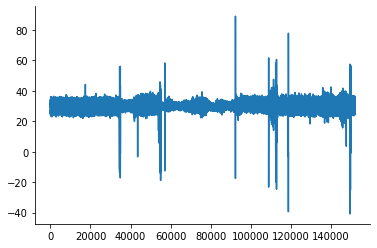

In [15]:
hw_df["values"].plot()

In [16]:
#@title Plot 
# Using plotly.express
import plotly.express as px

fig = px.line(hw_df, x='timestamp', y="values")
fig.show()

In [17]:
!pip install sysidentpy

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [18]:
!pip install sktime

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [19]:
from warnings import simplefilter
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from sysidentpy.model_structure_selection import FROLS
from sysidentpy.model_structure_selection import AOLS
from sysidentpy.model_structure_selection import MetaMSS
from sysidentpy.basis_function import Polynomial
from sysidentpy.utils.plotting import plot_results
from torch import nn
# from sysidentpy.metrics import mean_squared_error
from sysidentpy.neural_network import NARXNN

from sktime.datasets import load_airline
from sktime.forecasting.ets import AutoETS
from sktime.forecasting.arima import ARIMA, AutoARIMA
from sktime.forecasting.base import ForecastingHorizon
from sktime.forecasting.exp_smoothing import ExponentialSmoothing
from sktime.forecasting.fbprophet import Prophet
from sktime.forecasting.tbats import TBATS
from sktime.forecasting.bats import BATS
from sktime.forecasting.model_evaluation import evaluate
from sktime.forecasting.model_selection import temporal_train_test_split
from sktime.performance_metrics.forecasting import mean_squared_error
from sktime.utils.plotting import plot_series


simplefilter("ignore", FutureWarning)
np.seterr(all="ignore")

%matplotlib inline

loss = mean_squared_error

121 23


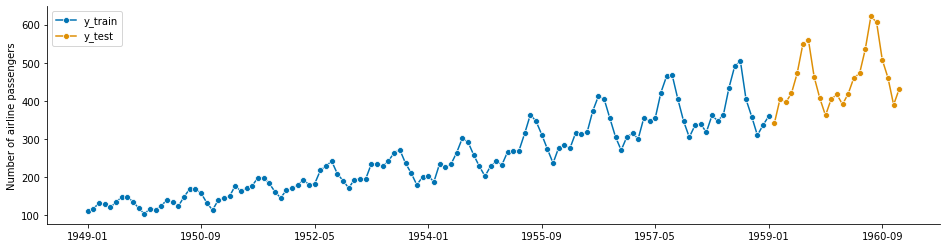

In [20]:
y = load_airline()
y_train, y_test = temporal_train_test_split(y, test_size=23) # 23 samples for testing
plot_series(y_train, y_test, labels=["y_train", "y_test"])
fh = ForecastingHorizon(y_test.index, is_relative=False)
print(y_train.shape[0], y_test.shape[0])

112026 40000


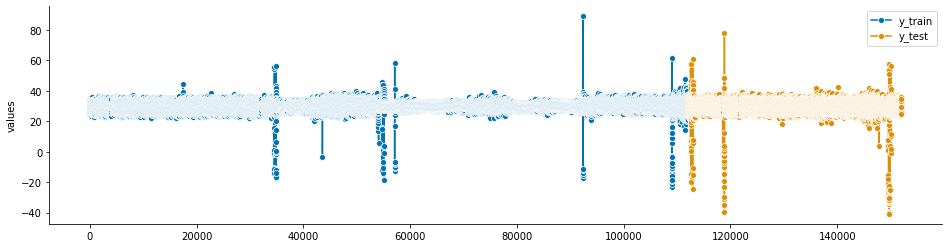

In [25]:
y = hw_df["values"]
y_train, y_test = temporal_train_test_split(y, test_size=40000) # 23 samples for testing
plot_series(y_train, y_test, labels=["y_train", "y_test"])
fh = ForecastingHorizon(y_test.index, is_relative=False)
print(y_train.shape[0], y_test.shape[0])

10.140522128602608


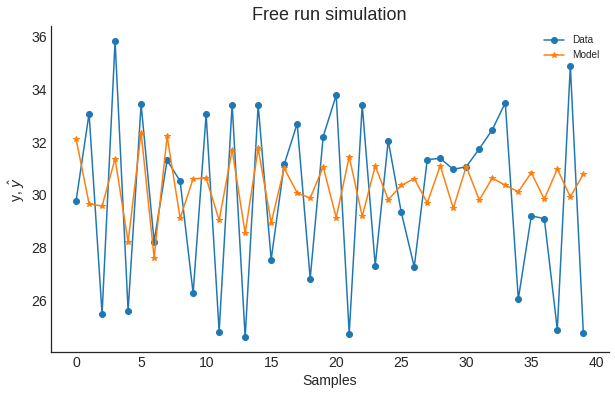

In [28]:
y = hw_df["values"]
y_train, y_test = temporal_train_test_split(y, test_size=40)
y_train = y_train.values.reshape(-1, 1)
y_test = y_test.values.reshape(-1, 1)

basis_function = Polynomial(degree=1)
sysidentpy = FROLS(
    order_selection=True,
    ylag=13, # the lags for all models will be 13
    basis_function=basis_function,
    model_type='NAR'
)
sysidentpy.fit(y=y_train)
y_test = np.concatenate([y_train[-sysidentpy.max_lag:], y_test])

yhat = sysidentpy.predict(y=y_test, forecast_horizon=40)
frols_loss = loss(
    pd.Series(y_test.flatten()[sysidentpy.max_lag:]),
    pd.Series(yhat.flatten()[sysidentpy.max_lag:])
)
print(frols_loss)

plot_results(y=y_test[sysidentpy.max_lag:], yhat=yhat[sysidentpy.max_lag:])